# Short Assignment 1

In this assignment, you will be working with the "beer foam" dataset. 

* The [beer foam dataset](http://www.stat.ufl.edu/~winner/datasets.html) was collected by A. Leike and published in their work titled "Demonstration of the Exponential Decay Law Using Beer Froth" in 2002.

#### Data Set Description

The data contains measurements of wet foam height and beer height at various time points for 3 brands of beer. The author of this data set fit an *exponential decay model* of the form $H(t) = H_0 e^{-\lambda t}$.

The data set is saved as a *.csv* file (**"beer_foam.csv"**) with information about the foam height (in cm) from 3 brands of beer over 15 measurement times (in seconds) after the time of pour.

The file is organized in 4 columns:
1. Time from pour (in seconds)
2. Erdinger Weissbier foam height (in cm)
3. Augustinerbrau Munchen foam height (in cm)
4. Budweiser foam height (in cm)

## Objectives

* Implement polynomial linear regression model on a given dataset
* Implement exponential regression model on a given dataset
* Utilize the train model to make predictions
* Assess the goodness-of-fit of each model
* Make observations and discuss limitations of model design in forecasting

## Problem Set

Answer the following questions:

1. Load the data using ```pandas```.

For the rest of this assignment, consider the first 12 samples the training set, and the last 3 samples the test set.

2. Build and train a polynomial regression model for **each** bear brand with model order $M=4$.

3. Build and train an exponential model with 2 parameters for **each** bear brand.

4. Predict the foam height for **each** beer brand for $t=450~$seconds after pour using the trained polynomial regression model (from problem 2) and exponential model (from problem 3).

5. Compare both models using plots (qualitative measure) and select a measure to assess the goodness-of-fit (quantitative measure). Based on these results and prediction for $t=450~$seconds for both models, discuss which performed best on this data.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('beer_foam.csv')

In [25]:
#MODEL ORDER
M_p = 4
M_e = 1

x_train = df.loc[:11, 'Time'].to_numpy()
x_test = df.loc[12:, 'Time'].to_numpy()
#TRAIN AND TEST FOR ERDINGER
erd_train = df.loc[:11, 'Erdinger'].to_numpy()
erd_test = df.loc[12:, 'Erdinger'].to_numpy()
#TRAIN AND TEST FOR AUGUSTINERBRAU
aug_train = df.loc[:11, 'Augustinerbrau'].to_numpy()
aug_test = df.loc[12:, 'Augustinerbrau'].to_numpy()
#TRAIN AND TEST FOR BUDWEISER
bud_train = df.loc[:11, 'Budweiser'].to_numpy()
bud_test = df.loc[12:, 'Budweiser'].to_numpy()

#LOG TRANSFORM
erd_train_log = np.log(erd_train)
erd_test_log = np.log(erd_test)

aug_train_log = np.log(aug_train)
aug_test_log = np.log(aug_test)

bud_train_log = np.log(bud_train)
bud_test_log = np.log(bud_test)

In [26]:
def PolynomialRegression(x,t,M):
    #COMPUTER FEATURE MATRIX
    X = np.array([x**m for m in range(M+1)]).T
    #COMPUTER COEFFICIENTS w
    w = np.linalg.inv(X.T@X)@X.T@t
    #MODEL PREDICTION
    y = X@w
    #RESIDUAL
    err = t-y
    return w, y, err

def PolynomialRegression_test(x, w, M):
    X = np.array([x**m for m in range(M+1)]).T
    y = X@w 
    return y

In [27]:
#POLYNOMIAL REGRESSION MODEL
erd_w, erd_y_train, erd_err = PolynomialRegression(x_train, erd_train, M_p)
aug_w, aug_y_train, aug_err = PolynomialRegression(x_train, aug_train, M_p)
bud_w, bud_y_train, bud_err = PolynomialRegression(x_train, bud_train, M_p)
#EXPONENTIAL MODEL
erd_w_log, erd_y_train_log, erd_err_log = PolynomialRegression(x_train, erd_train_log, M_e)
aug_w_log, aug_y_train_log, aug_err_log = PolynomialRegression(x_train, aug_train_log, M_e)
bud_w_log, bud_y_train_log, bud_err_log = PolynomialRegression(x_train, bud_train_log, M_e)
#POLYNOMIAL TEST
erd_y_test = PolynomialRegression_test(x_test, erd_w, M_p)
aug_y_test = PolynomialRegression_test(x_test, aug_w, M_p)
bud_y_test = PolynomialRegression_test(x_test, bud_w, M_p)
#EXPONENTIAL TEST
erd_y_test_log = PolynomialRegression_test(x_test, erd_w_log, M_e)
aug_y_test_log = PolynomialRegression_test(x_test, aug_w_log, M_e)
bud_y_test_log = PolynomialRegression_test(x_test, bud_w_log, M_e)

In [28]:
#POLYNOMIAL VS EXPONENTIAL
x_line = np.linspace(0, 450, 45000)
erd_yline = PolynomialRegression_test(x_line, erd_w, M_p)
aug_yline = PolynomialRegression_test(x_line, aug_w, M_p)
bud_yline = PolynomialRegression_test(x_line, bud_w, M_p)
erd_yline_log = PolynomialRegression_test(x_line, erd_w_log, M_e)
aug_yline_log = PolynomialRegression_test(x_line, aug_w_log, M_e)
bud_yline_log = PolynomialRegression_test(x_line, bud_w_log, M_e)
#PREDICTION FOR t=450
print("PREDICTIONS FOR t=450:")
print(f"Erdinger Polynomial: {erd_yline[-1]}")
print(f"Erdinger Exponential: {np.exp(erd_yline_log[-1])}")
print()
print(f"Augustinebrau Polynomial: {aug_yline[-1]}")
print(f"Augustinebrau Exponential: {np.exp(aug_yline_log[-1])}")
print()
print(f"Budweiser Polynomial: {bud_yline[-1]}")
print(f"Budweiser Exponential: {np.exp(bud_yline_log[-1])}")

PREDICTIONS FOR t=450:
Erdinger Polynomial: 19.01822383718423
Erdinger Exponential: 3.4721600835417123

Augustinebrau Polynomial: 50.56628513841264
Augustinebrau Exponential: 0.8006371356057415

Budweiser Polynomial: 49.29948827160433
Budweiser Exponential: 1.3574020314002666


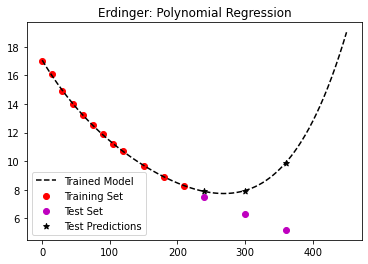

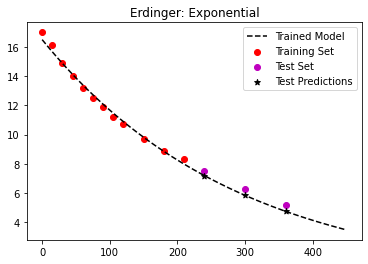

In [29]:
#ERDINGER POLYNOMIAL
plt.scatter(x_train, erd_train, c='r', label = 'Training Set')
plt.scatter(x_test, erd_test, c='m', label = 'Test Set')
plt.scatter(x_test, erd_y_test, c='k', marker='*', label = 'Test Predictions')
plt.plot(x_line, erd_yline, 'k--', label = 'Trained Model')
plt.title('Erdinger: Polynomial Regression')
plt.legend(fontsize=10)
plt.show();
#ERDINGER EXPONENTIAL
plt.scatter(x_train, np.exp(erd_train_log), c='r', label = 'Training Set')
plt.scatter(x_test, np.exp(erd_test_log), c='m', label = 'Test Set')
plt.scatter(x_test, np.exp(erd_y_test_log), c='k', marker='*', label = 'Test Predictions')
plt.plot(x_line, np.exp(erd_yline_log), 'k--', label = 'Trained Model')
plt.title('Erdinger: Exponential')
plt.legend(fontsize=10)
plt.show();

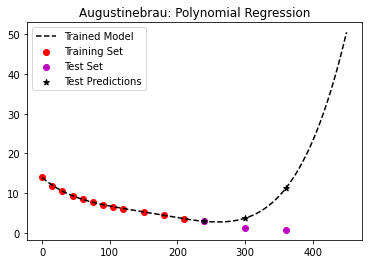

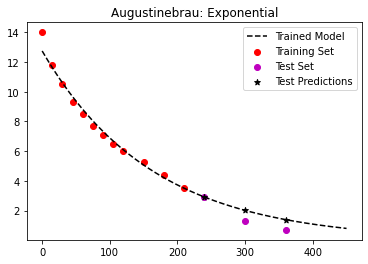

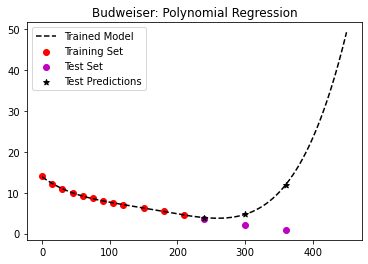

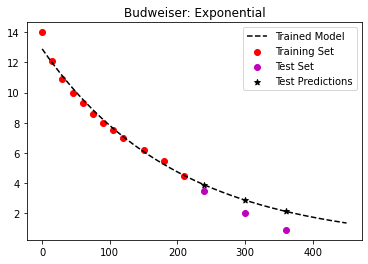

In [30]:
#AUGUSTINERBRAU POLYNOMIAL
plt.scatter(x_train, aug_train, c='r', label = 'Training Set')
plt.scatter(x_test, aug_test, c='m', label = 'Test Set')
plt.scatter(x_test, aug_y_test, c='k', marker='*', label = 'Test Predictions')
plt.plot(x_line, aug_yline, 'k--', label = 'Trained Model')
plt.title('Augustinebrau: Polynomial Regression')
plt.legend(fontsize=10)
plt.show();
#AUGUSTINERBRAU EXPONENTIAL
plt.scatter(x_train, np.exp(aug_train_log), c='r', label = 'Training Set')
plt.scatter(x_test, np.exp(aug_test_log), c='m', label = 'Test Set')
plt.scatter(x_test, np.exp(aug_y_test_log), c='k', marker='*', label = 'Test Predictions')
plt.plot(x_line, np.exp(aug_yline_log), 'k--', label = 'Trained Model')
plt.title('Augustinebrau: Exponential')
plt.legend(fontsize=10)
plt.show();
#BUDWEISER POLYNOMIAL
plt.scatter(x_train, bud_train, c='r', label = 'Training Set')
plt.scatter(x_test, bud_test, c='m', label = 'Test Set')
plt.scatter(x_test, bud_y_test, c='k', marker='*', label = 'Test Predictions')
plt.plot(x_line, bud_yline, 'k--', label = 'Trained Model')
plt.title('Budweiser: Polynomial Regression')
plt.legend(fontsize=10)
plt.show();
#BUDWEISER EXPONENTIAL
plt.scatter(x_train, np.exp(bud_train_log), c='r', label = 'Training Set')
plt.scatter(x_test, np.exp(bud_test_log), c='m', label = 'Test Set')
plt.scatter(x_test, np.exp(bud_y_test_log), c='k', marker='*', label = 'Test Predictions')
plt.plot(x_line, np.exp(bud_yline_log), 'k--', label = 'Trained Model')
plt.title('Budweiser: Exponential')
plt.legend(fontsize=10)
plt.show();

In [33]:
import scipy.stats as stats
#FINDING COEFFICIENT OF DETERMINATION
print("Erdinger:")
_, _, r, _, _ = stats.linregress(np.sort(erd_test), np.sort(erd_y_test))
print(f"Coefficient of determination(polynomial): {r**2}")
_, _, r, _, _ = stats.linregress(np.sort(erd_test_log), np.sort(erd_y_test_log))
print(f"Coefficient of determination(exponential): {r**2}")
print()
print("Augustinebrau:")
_, _, r, _, _ = stats.linregress(np.sort(aug_test), np.sort(aug_y_test))
print(f"Coefficient of determination(polynomial): {r**2}")
_, _, r, _, _ = stats.linregress(np.sort(aug_test_log), np.sort(aug_y_test_log))
print(f"Coefficient of determination(exponential): {r**2}")
print()
print("Budweiser:")
_, _, r, _, _ = stats.linregress(np.sort(bud_test), np.sort(bud_y_test))
print(f"Coefficient of determination(polynomial): {r**2}")
_, _, r, _, _ = stats.linregress(np.sort(bud_test_log), np.sort(bud_y_test_log))
print(f"Coefficient of determination(exponential): {r**2}")

Erdinger:
Coefficient of determination(polynomial): 0.7961681274205802
Coefficient of determination(exponential): 0.9992362586573317

Augustinebrau:
Coefficient of determination(polynomial): 0.9677084479216442
Coefficient of determination(exponential): 0.9944866800661033

Budweiser:
Coefficient of determination(polynomial): 0.8857618599289601
Coefficient of determination(exponential): 0.9897918514622898


In [32]:
#FINDING MSE
print("Erdinger: ")
print(f"MSE(polynomial): {(np.sum((erd_test - erd_y_test)**2))/erd_test.size}")
print(f"MSE(exponential): {(np.sum((np.exp(erd_test_log) - np.exp(erd_y_test_log))**2))/erd_test.size}")
print()
print("Augustinebrau: ")
print(f"MSE(polynomial): {(np.sum((aug_test - aug_y_test)**2))/aug_test.size}")
print(f"MSE(exponential): {(np.sum((np.exp(aug_test_log) - np.exp(aug_y_test_log))**2))/aug_test.size}")
print()
print("Budweiser: ")
print(f"MSE(polynomial): {(np.sum((bud_test - bud_y_test)**2))/bud_test.size}")
print(f"MSE(exponential): {(np.sum((np.exp(bud_test_log) - np.exp(bud_y_test_log))**2))/bud_test.size}")

Erdinger: 
MSE(polynomial): 8.297683210380544
MSE(exponential): 0.17476035474137278

Augustinebrau: 
MSE(polynomial): 38.388630111203746
MSE(exponential): 0.32969727633036316

Budweiser: 
MSE(polynomial): 43.19768551559492
MSE(exponential): 0.8073492822525464


## RESULTS
Solely using qualitative measures by looking at the plots of both models, it is clear that the exponential model fits the behavior of the data far better than the polynomial model does. When the polynomial model goes beyond the training data, it performs like a parabola and its predictions are far greater than the actual test data while the exponential model continues to follow the behavior of the test data.

Using quantiative measures, it is also clear to see that the exponential model fit the data much better than the polynomial model. For most models we want the coefficient of determination of the test data and the predicted data to be >> 99% and the polynomial model was far below that threshold for all 3 brands. The exponential model for Erginer and Augustinebrau had a coefficient of determination that was well within the desired range but for Budweiser, the model didn't quite reach the threshhold meaning that the foam didn't perfectly follow exponential decay and the model wasn't able to effectively predict foam height at times that were outside of the training set. I also calculated the MSE (mean squared error) for each brand for both models and found that the exponential model had a far smaller value than the polynomial model for the test set. This is a clear indication that the exponential model preformed better at predicting the values that are beyond the training set. 

Since this data set follows an exponential decay model, polynomial regression is not suitable for predicting data points that are outside of the domain of the training set. If a polynomial model was used to predict the foam height at some time outside of training data, it would be inaccurate. While the exponential model performed far better in this situation due to the nature of the data set, this doesn't mean that it is generally a better model to use for all data sets. 

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.